In [12]:
import os
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models

In [13]:
import os
from PIL import Image
import numpy as np

# Path to your image directory
image_dir = './data/shipsnet/shipsnet/'

# List all PNG images in the directory
image_files = [os.path.join(image_dir, file) for file in os.listdir(image_dir) if file.endswith('.png')]
print("Total images found:", len(image_files))


# Process and normalize images
images = []
labels = []

for image_path in image_files:
    # Extract label from filename ("1__" for ship, "0__" for no ship)
    label = int(os.path.basename(image_path).split("__")[0])
    labels.append(label)
    
    image = Image.open(image_path)
    image_array = np.array(image, dtype=np.float32) / 255.0
    images.append(image_array)

# Convert lists to numpy arrays
images = np.array(images)
labels = np.array(labels)



Total images found: 4000


In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(images, labels, test_size=0.2, random_state=42)


In [15]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(X_train.shape[1], X_train.shape[2], X_train.shape[3])),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 78, 78, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 39, 39, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 37, 37, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 18, 18, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 flatten_1 (Flatten)         (None, 16384)            

In [16]:
history = model.fit(X_train, Y_train, epochs=10, validation_split=0.2)


Epoch 1/10
80/80 [==============================] - 4s 46ms/step - loss: 0.3469 - accuracy: 0.8594 - val_loss: 0.2020 - val_accuracy: 0.9172
Epoch 2/10
80/80 [==============================] - 4s 45ms/step - loss: 0.2133 - accuracy: 0.9168 - val_loss: 0.2797 - val_accuracy: 0.8797
Epoch 3/10
80/80 [==============================] - 4s 45ms/step - loss: 0.1656 - accuracy: 0.9379 - val_loss: 0.1762 - val_accuracy: 0.9312
Epoch 4/10
80/80 [==============================] - 4s 45ms/step - loss: 0.1356 - accuracy: 0.9449 - val_loss: 0.1766 - val_accuracy: 0.9359
Epoch 5/10
80/80 [==============================] - 4s 45ms/step - loss: 0.1171 - accuracy: 0.9539 - val_loss: 0.1300 - val_accuracy: 0.9500
Epoch 6/10
80/80 [==============================] - 4s 45ms/step - loss: 0.1135 - accuracy: 0.9531 - val_loss: 0.1339 - val_accuracy: 0.9516
Epoch 7/10
80/80 [==============================] - 4s 45ms/step - loss: 0.0806 - accuracy: 0.9695 - val_loss: 0.1133 - val_accuracy: 0.9516
Epoch 8/10
80

In [17]:
test_loss, test_acc = model.evaluate(X_test, Y_test)
print(f"Test accuracy: {test_acc}")


25/25 [==============================] - 0s 12ms/step - loss: 0.0958 - accuracy: 0.9688
Test accuracy: 0.96875


4/4 [==============================] - 0s 10ms/step


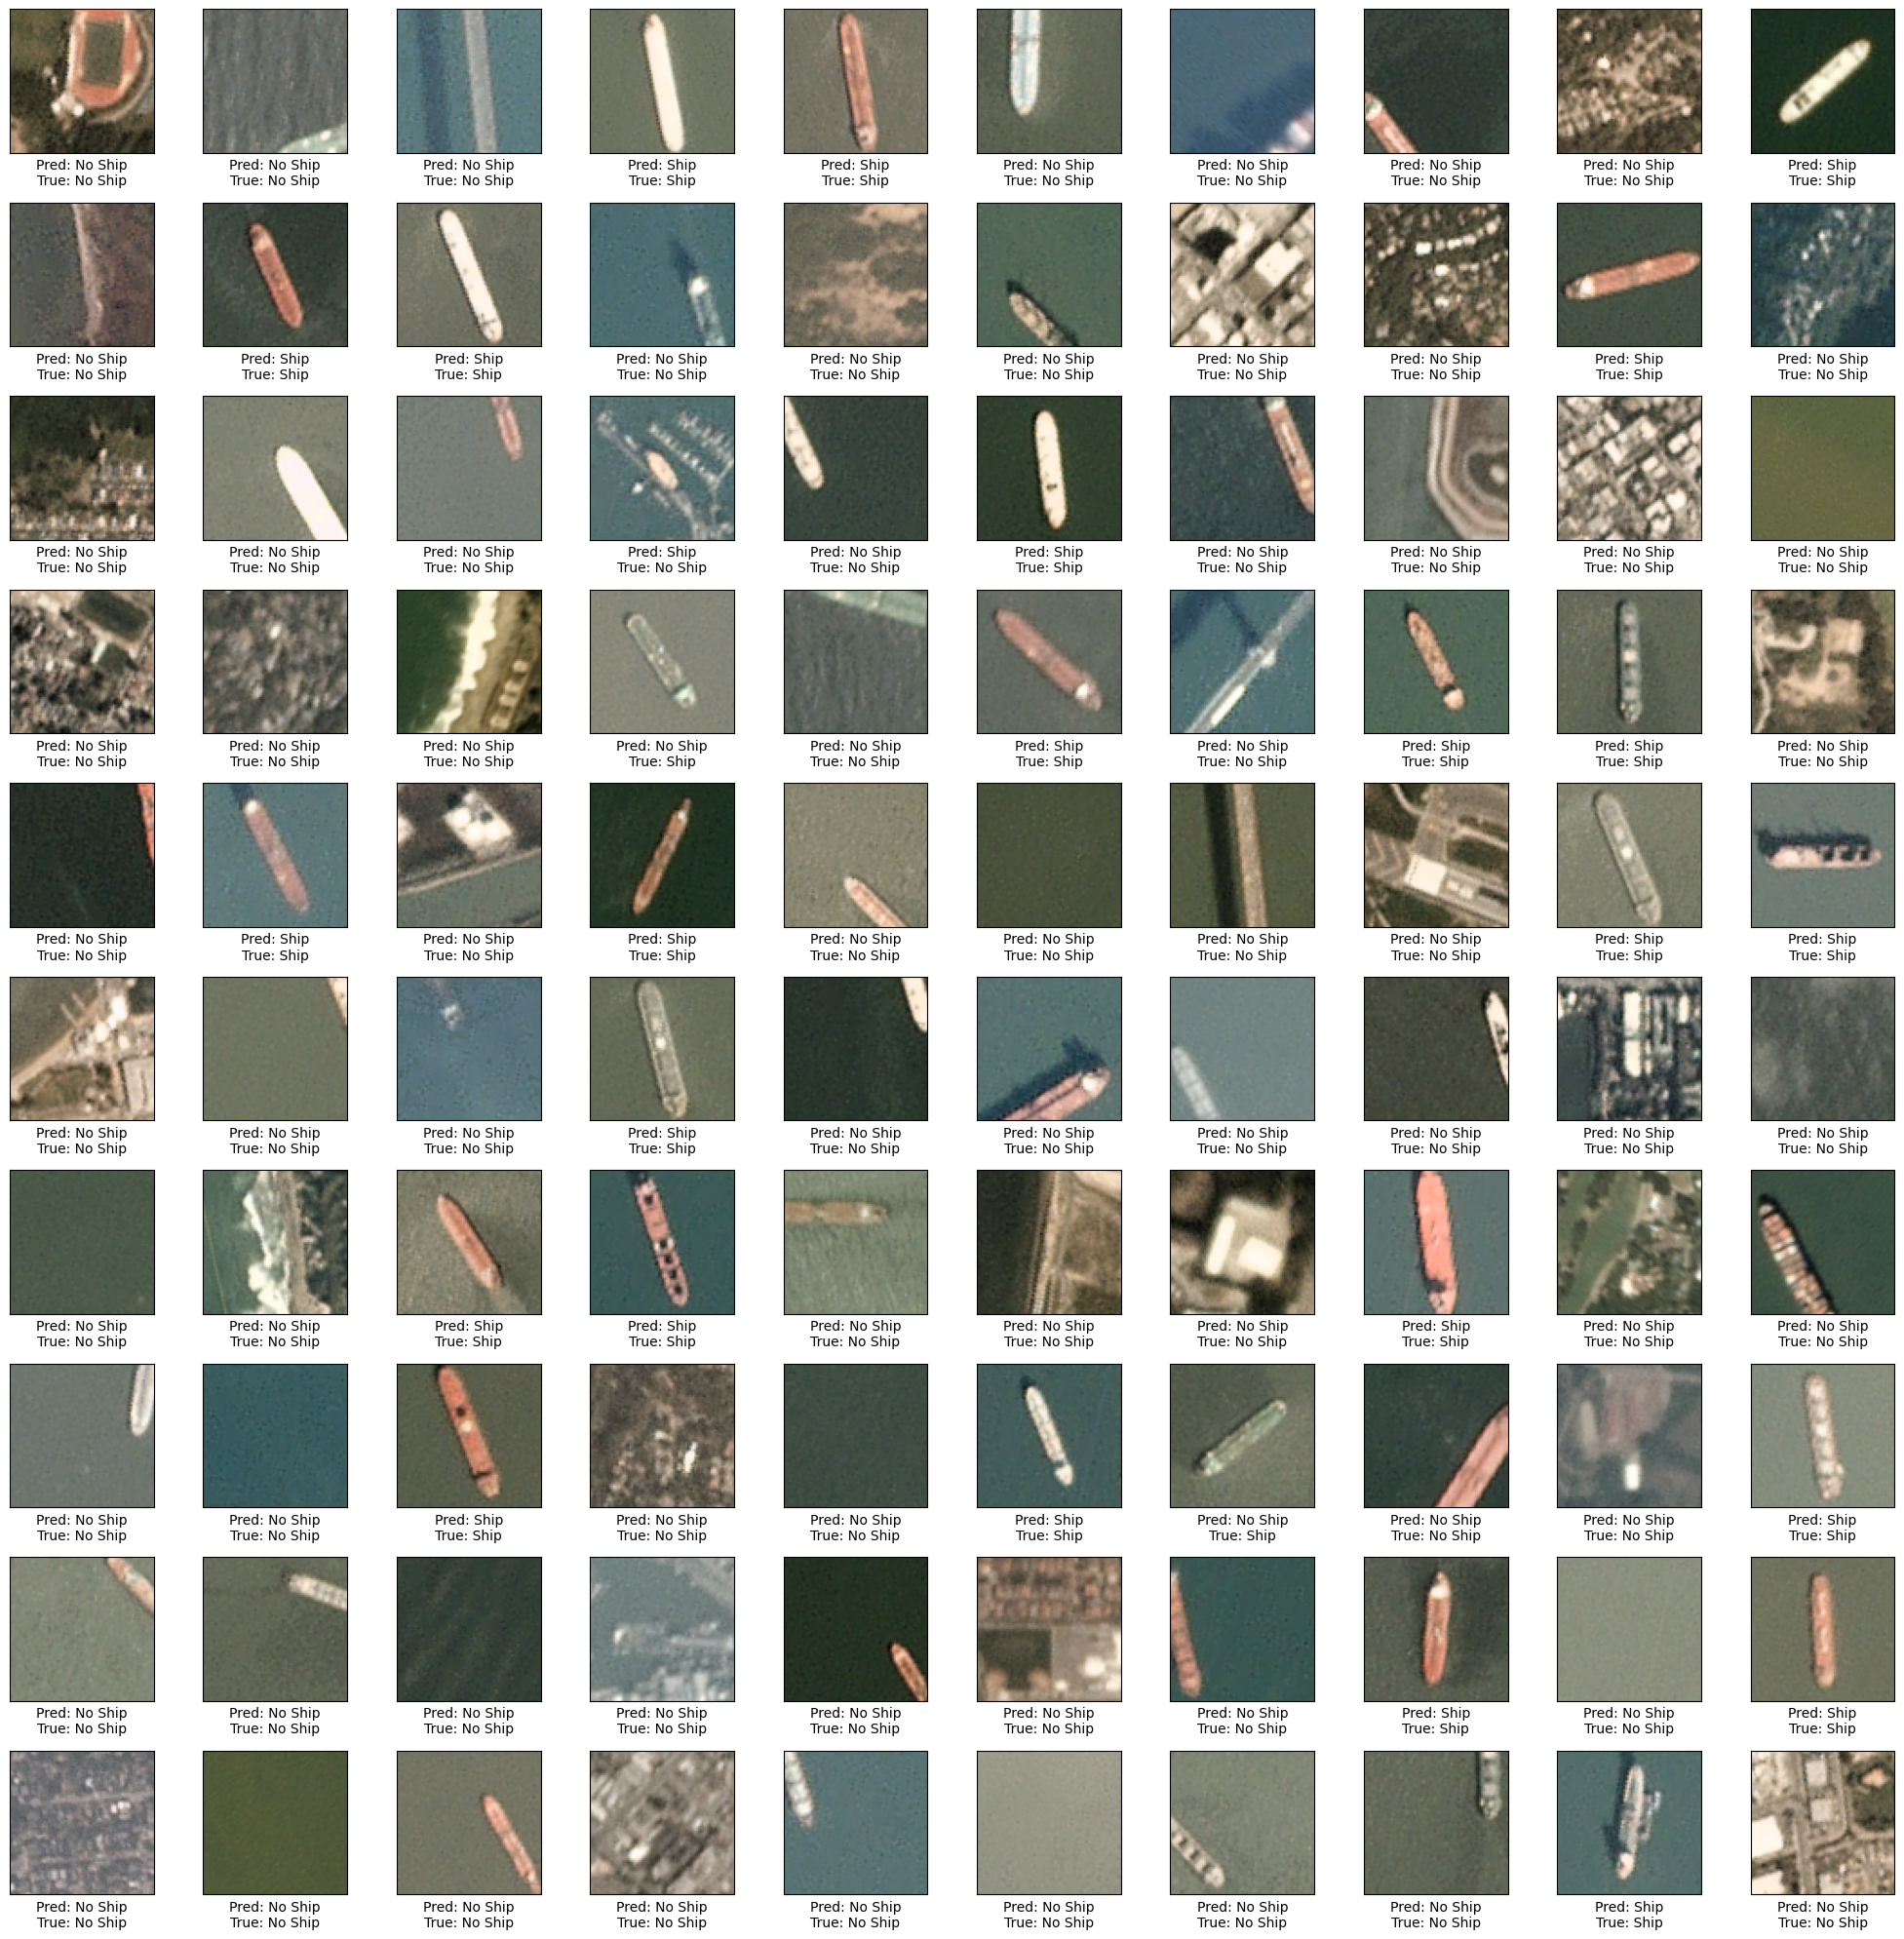

In [18]:
import matplotlib.pyplot as plt

def plot_image_matrix(images, true_labels, predictions, class_names=['No Ship', 'Ship']):
    """
    Plot a 10x10 matrix of images with their predicted and actual labels.

    Parameters:
    - images: The images to plot.
    - true_labels: The true labels of the images.
    - predictions: The predicted labels of the images.
    - class_names: A list of class names corresponding to labels.
    """
    plt.figure(figsize=(20, 20))
    for i in range(100): # Assuming you want to plot 100 images (10x10)
        plt.subplot(10, 10, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(f"Pred: {class_names[predictions[i]]}\nTrue: {class_names[true_labels[i]]}")
    plt.tight_layout()
    plt.show()

# Generate predictions for the first 100 images in your test set
predictions = model.predict(X_test[:100])
predicted_labels = [1 if pred > 0.5 else 0 for pred in predictions]

# Plotting the 10x10 matrix with predicted and actual labels
plot_image_matrix(X_test[:100], Y_test[:100], predicted_labels)


4/4 [==============================] - 0s 10ms/step


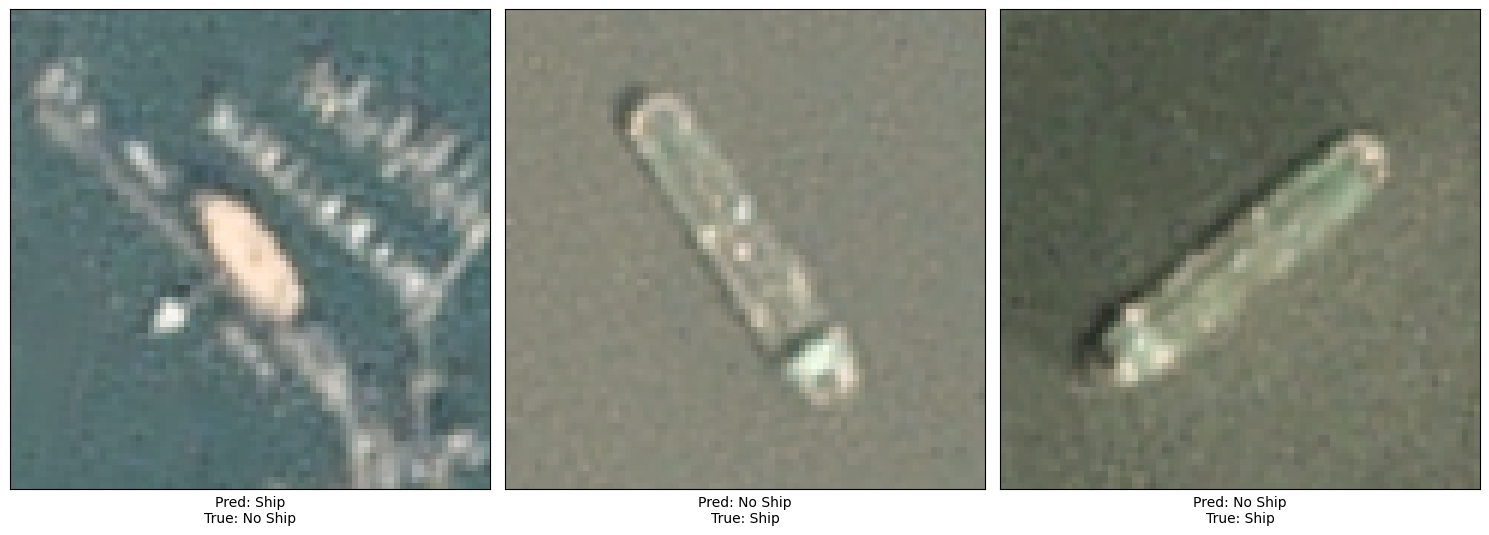

In [20]:
def plot_incorrect_predictions(images, true_labels, predictions, class_names=['No Ship', 'Ship'], max_images=10):
    """
    Plot a selection of images that were incorrectly predicted, along with their predicted and actual labels.

    Parameters:
    - images: The images to plot.
    - true_labels: The true labels of the images.
    - predictions: The predicted labels of the images.
    - class_names: A list of class names corresponding to labels.
    - max_images: Maximum number of incorrect predictions to display.
    """
    incorrects = np.nonzero(predictions != true_labels)[0]
    if len(incorrects) > max_images:
        incorrects = incorrects[:max_images]  # Limit the number of images to display
    plt.figure(figsize=(15, 3 * len(incorrects)))
    for i, incorrect in enumerate(incorrects, 1):
        plt.subplot(1, len(incorrects), i)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[incorrect], cmap=plt.cm.binary)
        plt.xlabel(f"Pred: {class_names[predictions[incorrect]]}\nTrue: {class_names[true_labels[incorrect]]}")
    plt.tight_layout()
    plt.show()

# Assuming `X_test`, `Y_test` are your test images and true labels
# And assuming `model` is your trained model

# Generate predictions for the SAME subset of images you're analyzing
subset_predictions = model.predict(X_test[:100])
# Convert predictions to binary labels
subset_predicted_labels = [1 if pred > 0.5 else 0 for pred in subset_predictions]

# Now call the function with the correctly sized subsets
plot_incorrect_predictions(X_test[:100], Y_test[:100], subset_predicted_labels)
